In [1]:
from data_import import *
import matplotlib.pyplot as plt

# LOAD THE DATA AND SPLIT UP THINGS
X_tr, Y_tr, X_val, Y_val, classes, filepaths = read_csv_as_numpy() 

print(X_tr.shape)

(10212, 2500)


In [3]:
# RELOAD AND STRUCTURE DATA FOR CNN
from sklearn.discriminant_analysis import StandardScaler
from tensorflow.keras.utils import to_categorical
X_tr, Y_tr, X_val, Y_val, classes, filepaths = read_csv_as_numpy()


# Reshape inputs for scaling (flatten temporarily)
X_tr_flat = X_tr.reshape(X_tr.shape[0], -1)  # Shape: (num_samples, 50*50)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Apply StandardScaler
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr_flat)  # Scale training data
X_val_scaled = scaler.transform(X_val_flat)   # Scale validation data using the same scaler

# Reshape back to (50, 50, 1) for CNN
X_tr = X_tr_scaled.reshape(-1, 50, 50, 1)
X_val = X_val_scaled.reshape(-1, 50, 50, 1)

# One-hot encode the labels
num_classes = len(np.unique(Y_tr))  # Calculate number of classes
Y_tr = to_categorical(Y_tr, num_classes)
Y_val = to_categorical(Y_val, num_classes)

# Print shapes for verification
print(f"X_tr shape: {X_tr.shape}, Y_tr shape: {Y_tr.shape}")
print(f"X_val shape: {X_val.shape}, Y_val shape: {Y_val.shape}")

X_tr shape: (10212, 50, 50, 1), Y_tr shape: (10212, 8)
X_val shape: (2553, 50, 50, 1), Y_val shape: (2553, 8)


In [4]:
# CNN
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Example data setup: replace with your own dataset
# Assuming `X_train`, `X_test`, `y_train`, `y_test` are ready

# Reshape data
# X_tr = np.reshape(X_tr, (-1, 50, 50, 1))
# X_val = np.reshape(X_val, (-1, 50, 50, 1))


# Normalize the image pixel values
# X_tr = X_tr.astype('float32') / 255.0  # Scale to [0, 1]
# X_val = X_val.astype('float32') / 255.0

# If images are grayscale, add a channel dimension


# If labels are integers (e.g., 0, 1, ..., num_classes-1), convert to one-hot

start = time.time()
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)), 
    MaxPooling2D(pool_size=(2, 2)),  
    Dropout(0.25),
    Conv2D(32, (6, 6), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# L2 Regularized model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1), kernel_regularizer=l2(0.01)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
#     Dense(8, activation='softmax')
# ])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_tr, Y_tr, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, Y_val)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

end = time.time()
print(f"It took {end-start} seconds.")

Epoch 1/10


/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.4795 - loss: 1.0725 - val_accuracy: 0.4747 - val_loss: 1.0119
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5037 - loss: 0.9840 - val_accuracy: 0.5131 - val_loss: 0.9647
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5211 - loss: 0.9538 - val_accuracy: 0.5131 - val_loss: 0.9566
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5283 - loss: 0.9478 - val_accuracy: 0.5135 - val_loss: 0.9552
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5239 - loss: 0.9501 - val_accuracy: 0.5135 - val_loss: 0.9558
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5391 - loss: 0.9695 - val_accuracy: 0.5163 - val_loss: 0.9540
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5371 - loss: 0.9405 - val_accuracy: 0.5139 - val_loss: 0.9528
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5399 - loss: 0.9306 - val_accuracy: 0.511

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def cnn_model():
    model= tf.keras.models.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(50, 50, 1)))
    model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten()) 
    model.add(Dense(256,activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
        
    model.add(Dense(512,activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(8, activation='softmax'))
    return model

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.1321 - loss: 15.0669
Epoch 1: val_accuracy improved from -inf to 0.09636, saving model to best_model.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 107s 655ms/step - accuracy: 0.1322 - loss: 15.0654 - val_accuracy: 0.0964 - val_loss: 13.8199
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.2128 - loss: 14.1057
Epoch 2: val_accuracy improved from 0.09636 to 0.49236, saving model to best_model.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 100s 624ms/step - accuracy: 0.2129 - loss: 14.1043 - val_accuracy: 0.4924 - val_loss: 13.3418
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.2800 - loss: 13.2407
Epoch 3: val_accuracy did not improve from 0.49236
160/160 ━━━━━━━━━━━━━━━━━━━━ 100s 624ms/step - accuracy: 0.2802 - loss: 13.2394 - val_accuracy: 0.4360 - val_loss: 12.4064
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.3633 - loss: 12.3800
Epoch 4: val_accuracy did not improve from 0.4923

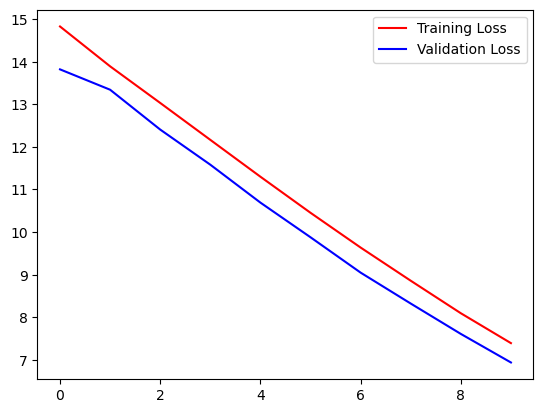

In [15]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping

model = cnn_model()

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 5),
                ModelCheckpoint('best_model.keras',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

datagen = ImageDataGenerator(  width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)
valgen = ImageDataGenerator(   width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2) 

train_generator = datagen.flow(X_tr, Y_tr, batch_size=64)
val_generator = datagen.flow(X_val, Y_val, batch_size=64)

history = model.fit(train_generator,
                    epochs=10,
                    batch_size=64,   
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

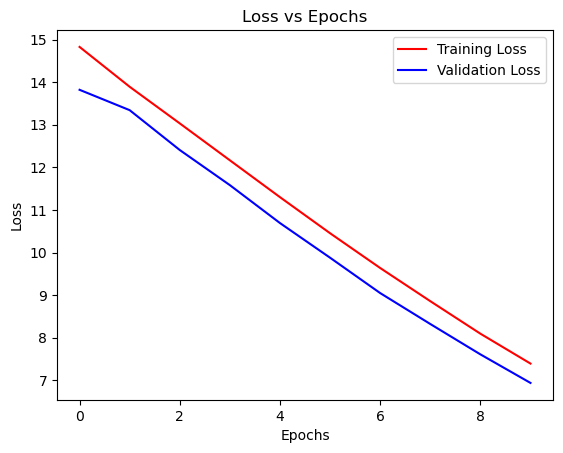

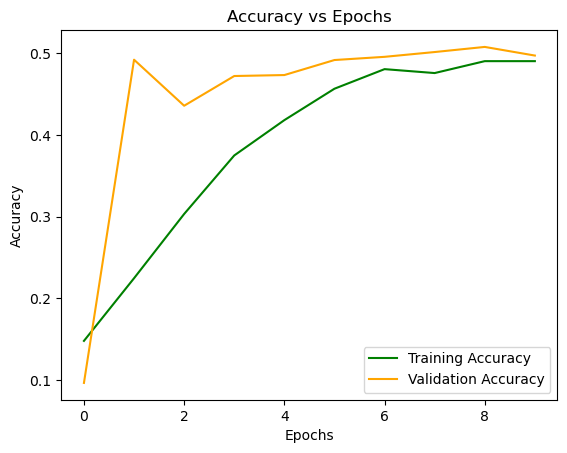

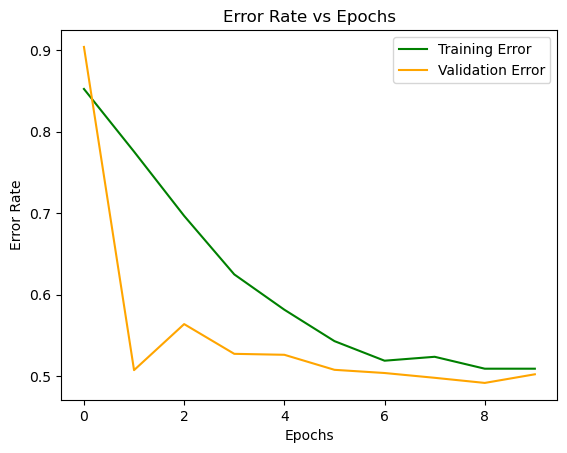

In [16]:
# Plot Training and Validation Loss
plt.plot(history.history["loss"], 'r', label="Training Loss")
plt.plot(history.history["val_loss"], 'b', label="Validation Loss")
plt.legend()
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot Training and Validation Accuracy
plt.plot(history.history["accuracy"], 'g', label="Training Accuracy")
plt.plot(history.history["val_accuracy"], 'orange', label="Validation Accuracy")
plt.legend()
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot Training and Validation Error
train_error = [1 - acc for acc in history.history["accuracy"]]
val_error = [1 - acc for acc in history.history["val_accuracy"]]

plt.plot(train_error, 'g', label="Training Error")
plt.plot(val_error, 'orange', label="Validation Error")
plt.legend()
plt.title('Error Rate vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.show()